<h1>Import the Libraries<h1>

In [44]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<h1>load and split the handwritten data integer data set <h1>

In [45]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [46]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

<h1>Convert the pixel values between 0 and 1<h1>

In [47]:
x_train=x_train/255
x_test=x_test/255

In [48]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [55]:
model=keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(100,input_shape=(784,),activation='relu'),
        keras.layers.Dense(50,activation='relu'),
        keras.layers.Dense(10,activation='sigmoid')
    ])

model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

model.fit(x_train,y_train,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2511 - accuracy: 0.9270
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1088 - accuracy: 0.9664
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0765 - accuracy: 0.9762
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0617 - accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0483 - accuracy: 0.9850


In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0840 - accuracy: 0.9770


[0.0840018093585968, 0.9769999980926514]

In [ ]:
y_pred=model.predict(x_test)
y_pred[0]

array([2.1761954e-03, 3.3570492e-01, 8.1249332e-01, 2.0330423e-01,
       2.8014183e-04, 3.9225817e-04, 1.0319975e-07, 9.9999821e-01,
       6.5815151e-03, 7.0268232e-01], dtype=float32)

In [ ]:
np.argmax(y_pred[0])


7

In [ ]:
y_predictedann=[np.argmax(element) for element in y_pred]
y_predictedann[:5]

[7, 2, 1, 0, 4]

In [ ]:
def predicted_visual(x,y,index):
    plt.matshow(x[index])
    print(y[index])

2


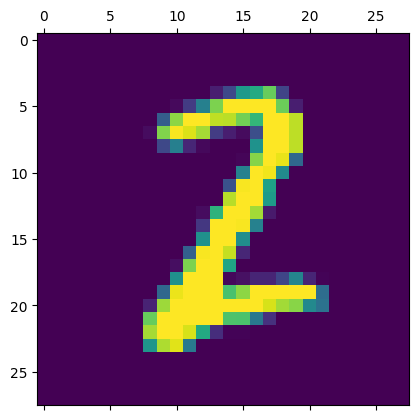

In [ ]:
predicted_visual(x_test,y_predictedann,256)

In [ ]:
from tensorflow.keras import  layers, models

In [ ]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

In [ ]:
CNN=models.Sequential([

    #CNN Layers
    layers.Conv2D(filters=28,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    #Ann Dense network
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')

])

CNN.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

CNN.fit(x_train,y_train,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 30s 15ms/step - loss: 0.1757 - accuracy: 0.9483
Epoch 2/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0602 - accuracy: 0.9822
Epoch 3/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0405 - accuracy: 0.9874
Epoch 4/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0303 - accuracy: 0.9905
Epoch 5/5
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0204 - accuracy: 0.9933


In [ ]:
CNN.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0441 - accuracy: 0.9851


[0.044111963361501694, 0.9850999712944031]

In [50]:
y_pred_cnn=CNN.predict(x_test)
y_pred_cnn[:5]

array([[4.0877097e-08, 6.6642428e-08, 2.1616468e-06, 1.4269374e-05,
        4.4765592e-08, 2.3291000e-10, 5.4485794e-13, 9.9997270e-01,
        1.8296693e-07, 1.0458331e-05],
       [1.7591371e-07, 1.5415619e-08, 9.9999988e-01, 3.5744926e-10,
        6.9470471e-14, 9.6610057e-13, 5.6507121e-10, 1.7022087e-12,
        5.7523586e-09, 3.9409686e-13],
       [5.1422728e-07, 9.9994636e-01, 3.3321956e-07, 5.5178445e-10,
        6.1447972e-06, 8.0789469e-08, 3.9024317e-07, 4.2984273e-05,
        3.0616100e-06, 1.5680186e-09],
       [9.9998784e-01, 8.6187502e-10, 7.7830853e-09, 2.7853300e-10,
        8.4721070e-11, 3.0935643e-10, 1.2009577e-05, 6.4070932e-08,
        2.9260703e-09, 4.4033559e-09],
       [9.1281159e-08, 1.0383845e-09, 2.3658867e-08, 2.2324855e-09,
        9.9998522e-01, 6.9701461e-10, 3.2901590e-07, 2.0238819e-08,
        2.5479670e-07, 1.4080408e-05]], dtype=float32)

In [51]:
y_predicted_cnn=[np.argmax(element) for element in y_pred_cnn]
y_predicted_cnn[:5]

[7, 2, 1, 0, 4]

In [52]:
def predicted_visual(x,y,index):
    plt.matshow(x[index])
    print(y[index])

5


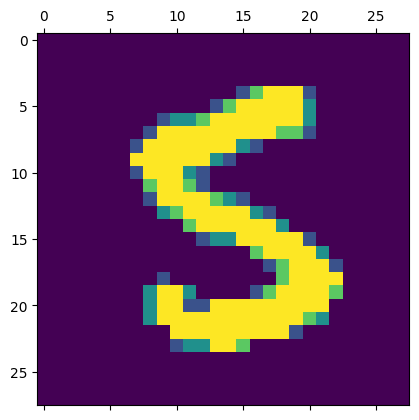

In [54]:
predicted_visual(x_test,y_predicted_cnn,132)